In [1]:
import torch
from supervoice.model import SuperVoice
from train_config import config
from utils.misc import dict_to_object, plot_specgram, plot_waveform
from IPython.display import Audio, display

In [2]:
# Load model
device = "cpu"
model = SuperVoice(config)
model.audio_model.load_state_dict(torch.load(f'./output/audio_large_begin_end.pt', map_location="cpu")['model'])
model.duration_model.load_state_dict(torch.load(f'./output/duration_common_n_t.pt', map_location="cpu")['model'])
model.eval()
print("ok")

Using cache found in /home/steve/.cache/torch/hub/ex3ndr_supervoice-vocoder_master
Failed to create secure directory (/run/user/1000/pulse): No such file or directory
Failed to create secure directory (/run/user/1000/pulse): No such file or directory
Failed to create secure directory (/run/user/1000/pulse): No such file or directory
Failed to create secure directory (/run/user/1000/pulse): No such file or directory


ok


['j', 'oʊ', '<SIL>', 'b', 'ɹ', 'oʊ', '<SIL>', 'w', 'ʌ', 't', 's', 'ʌ', 'p']


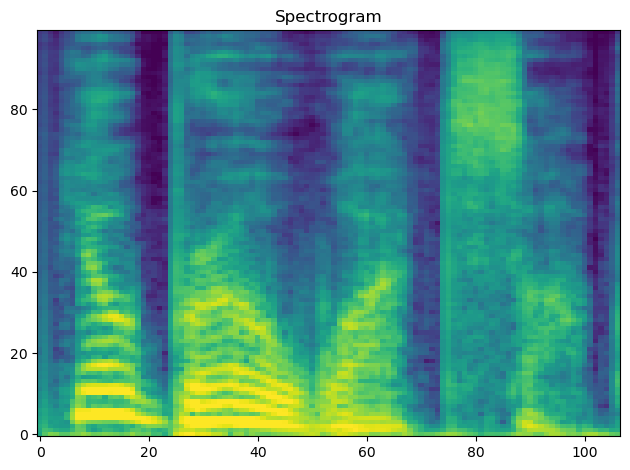

In [3]:
spec, audio = model.tts("yo bro whatsup?", steps = 8, speed = 1.1)
plot_specgram(spec.detach().transpose(1,0).cpu())
display(Audio(data=audio, rate=24000))